# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [ ]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [ ]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

dataset_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
print(dataset_train)

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)


In [ ]:
len(loader_train)

600

In [ ]:

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [ ]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [ ]:
model = torch.nn.Linear(28*28, 10)

In [ ]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.3262,  0.2953, -0.7670, -1.3773, -0.9760,  0.2126, -0.7629,  0.1944,
          0.2736, -1.1068]], grad_fn=<AddmmBackward0>)

In [ ]:
x, _ = dataset_train[0]
x = x.view(-1, 28 * 28)
predict = model(x)
predict

tensor([[ 0.2832, -0.1737, -0.1346, -0.2619, -0.4438,  0.3731, -0.3558,  0.0601,
         -0.1442, -0.1622]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [ ]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [ ]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for data in loader_train:
        (x_train, y_train) = data
        # Transforma a entrada para uma dimensão

        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f"Época: {i + 1}/{n_epochs}, Batch: {batch_size}/{len(loader_train)}, Loss: {loss.item():.4f}")

Época: 1/5, Batch: 100/600, Loss: 2.3007
Época: 1/5, Batch: 100/600, Loss: 1.8841
Época: 1/5, Batch: 100/600, Loss: 1.5022
Época: 1/5, Batch: 100/600, Loss: 1.3177
Época: 1/5, Batch: 100/600, Loss: 1.3806
Época: 1/5, Batch: 100/600, Loss: 1.3476
Época: 1/5, Batch: 100/600, Loss: 1.4598
Época: 1/5, Batch: 100/600, Loss: 1.3335
Época: 1/5, Batch: 100/600, Loss: 1.5146
Época: 1/5, Batch: 100/600, Loss: 0.9135
Época: 1/5, Batch: 100/600, Loss: 0.9647
Época: 1/5, Batch: 100/600, Loss: 0.8443
Época: 1/5, Batch: 100/600, Loss: 0.8045
Época: 1/5, Batch: 100/600, Loss: 0.8312
Época: 1/5, Batch: 100/600, Loss: 1.1071
Época: 1/5, Batch: 100/600, Loss: 0.6547
Época: 1/5, Batch: 100/600, Loss: 0.6976
Época: 1/5, Batch: 100/600, Loss: 0.7449
Época: 1/5, Batch: 100/600, Loss: 0.6780
Época: 1/5, Batch: 100/600, Loss: 0.7084
Época: 1/5, Batch: 100/600, Loss: 0.6860
Época: 1/5, Batch: 100/600, Loss: 0.7748
Época: 1/5, Batch: 100/600, Loss: 0.5724
Época: 1/5, Batch: 100/600, Loss: 0.6864
Época: 1/5, Batc

In [ ]:
print('Final loss:', loss.data)

Final loss: tensor(0.2695)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

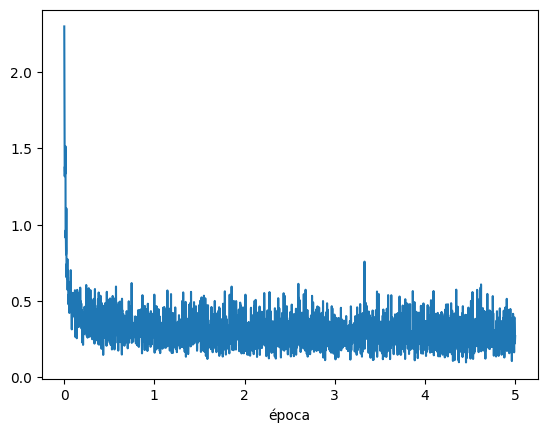

In [ ]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

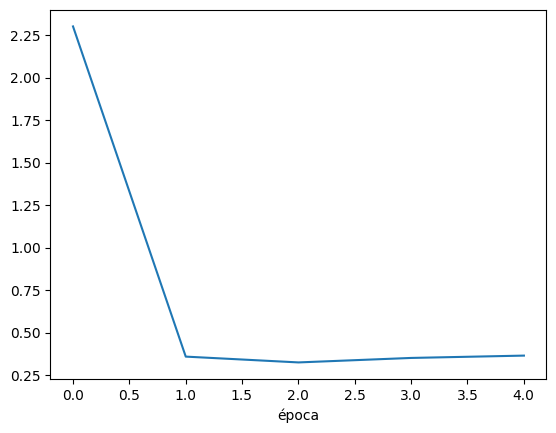

In [ ]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
R.: 100
2. Em uma época, quantos mini-batches existem?
R.: 600
3. Qual é a definição de época?
R.: Um ciclo, loop, onde todas as amostras da base de dados são avaliadas pelo modelo, seja diretamente ou em mini-batches. E após o cálculo da perda, os pesos da rede são atualizados.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [ ]:
batch_sizes = [50, 100, 200]  # Diferentes tamanhos de batch
batch_loss_histories = {}

for batch_size in batch_sizes:
    print(f"\nTreinando com batch_size = {batch_size}")
    # Reinicializa o DataLoader com o novo batch_size
    loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

    # Reinicializa o modelo e otimizador
    model = torch.nn.Linear(28 * 28, 10)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

    # Treinamento
    epochs = []
    losses = []

    for epoch in range(n_epochs):
        for data in loader_train:
            (x_train, y_train) = data
            inputs = Variable(x_train.view(-1, 28 * 28))
            outputs = model(inputs)
            loss = criterion(outputs, Variable(y_train))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epochs.append(epoch + len(epochs) / len(loader_train))
            losses.append(loss.item())

    # Armazena os valores de perda para este batch_size
    batch_loss_histories[batch_size] = losses


Treinando com batch_size = 50

Treinando com batch_size = 100

Treinando com batch_size = 200


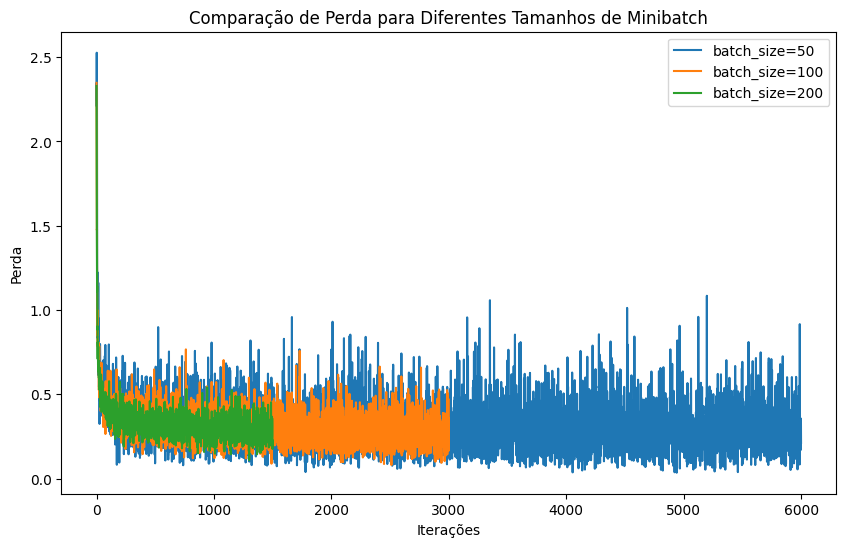

In [ ]:
plt.figure(figsize=(10, 6))
for batch_size, losses in batch_loss_histories.items():
    plt.plot(losses, label=f'batch_size={batch_size}')
plt.xlabel('Iterações')
plt.ylabel('Perda')
plt.legend()
plt.title('Comparação de Perda para Diferentes Tamanhos de Minibatch')
plt.show()

## Conclusões sobre os experimentos deste notebook


Foi interessante a variação entre os minibatches para entender o funcionamento de cada um.
- O tamanho 100 pareceu oferecer um bom equilíbrio entre estabilidade do treinamento e eficiência computacional.
- Pequenos tamanhos de minibatch aceleram a diminuição inicial da perda mas com menos interações quando comparado com outros.
- Tamanhos maiores são mais estáveis, mas menos dinâmicos em termos de iterações iniciais.
